**3. Density Operator master equations**

**3.1. Introduction to Lindblad master equation**

The Gorini-Kossakowski-Sudarshan-Lindblad (GKSL) master equation, often known as the *Lindblad* master equation:

$$\dot{\rho}(t) = -\frac{i}{\hbar} [H, \rho(t)] + \sum_k \gamma_k \left(L_k\rho(t)L_k^\dagger - \frac{1}{2}\Bigl\{L_k^\dagger L_k, \rho(t)\Bigr\}\right)$$

where $\{L_k\}$ are the *Lindblad* operators representing some non-unitary processes like relaxation or decoherence that occur at some rates $\{\gamma_k\}$.

Like the Hamiltonian generates coherent dynamics, the Lindblad operators generate incoherent transitions in the space of states. Unlike the Hamiltonian, they do not need to be hermitian. For example, a decay transition from some excited state $|e\rangle$ to some ground state $|g\rangle$ is mediated by the Lindblad operator

$$L_\downarrow = |g\rangle\langle e|$$

Indeed, when we apply $L_\downarrow$ to $|e\rangle$ we obtain $|g\rangle = L_\downarrow|e\rangle$. Note that $L_\downarrow^\dagger = |e\rangle\langle g| \neq L_\downarrow$.

This Lindblad equation is used to approxiamte the evolution of the density operator of a system $\text{S}$ with Hamiltonian $H$ that is weakly coupled to a Markovian (memory-less) environment, and is a general form for a **completely positive and trace-preserving (CPTP) Markovian** and **time-homogeneous map** for the evolution of the system's density operator $\rho$.

**3.2 The Liouville superoperator**

When solving the Lindblad equation, it is convenient to express the master equation in a vector notation,

$$\dot{\boldsymbol{\rho}} = \mathcal{L}\boldsymbol{\rho}$$

known as a *superoperator* or *Liouville* form, where $\boldsymbol{\rho} = \text{vec}(\rho)$ is the *vectorized* form of $\rho$, and $\mathcal{L}$ is the superoperator associated with the generator $\dot{\rho}$.

In [1]:
import numpy as np

psi = np.array([1, 2j, 0, -2.0j])
rho = np.outer(psi, psi.conj())

rho /= np.trace(rho)
d = len(psi)

vec_rho = np.reshape(rho, (d**2, 1))

print(f'vectorized rho = \n{vec_rho}\n')

vectorized rho = 
[[ 0.11111111+0.j        ]
 [ 0.        -0.22222222j]
 [ 0.        +0.j        ]
 [ 0.        +0.22222222j]
 [ 0.        +0.22222222j]
 [ 0.44444444+0.j        ]
 [ 0.        +0.j        ]
 [-0.44444444+0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [-0.        -0.22222222j]
 [-0.44444444+0.j        ]
 [ 0.        +0.j        ]
 [ 0.44444444+0.j        ]]



**3.2.1. Constructing the Liouville superoperator**

Two common ways to construct the superoperator $\mathcal{L}$ are to either follow an index prescription for the superoperator tensor $\rho_{ab} = \sum_{cd}\mathcal{L}_{abcd}\rho_{cd}$, or to use the following linear algebra idenity for the column-ordered form of $\text{vec}(\rho)$:

$$\text{vec}(AXB) = (B^\text{T} \otimes A)\text{vec}(X)$$

Thus, the Lindblad equation:

$$ \mathbf{1}\dot{\rho}\mathbf{1} = -\frac{i}{\hbar}\left(H\rho\mathbf{1} - \mathbf{1}\rho H \right) + \sum_k \gamma_k \left(L_k\rho L_k^\dagger - \frac{1}{2} \left(L_k^\dagger L_k \rho \mathbf{1} + \mathbf{1}\rho L_k^\dagger L_k \right) \right) $$

Now we obtain the Liouville superoperator:

$$ \mathcal{L} = -\frac{i}{\hbar}\left(\mathbf{1} \otimes H - H^\text{T} \otimes \mathbf{1} \right) + \sum_k \gamma_k \left(L_k^* \otimes L_k - \frac{1}{2} \left(\mathbf{1} \otimes L_k^\dagger L_k + L_k^\text{T} L_k^* \otimes \mathbf{1} \right) \right) $$

In [2]:
import numpy as np

'''
Constructs the Liouville superoperator
from the Hamiltonian and the set of Lindblad operators.
'''
def Liouvillian(H, Ls, hbar = 1):
    d = len(H)
    superH = -1j/hbar * (np.kron(np.eye(d), H) - np.kron(H.T, np.eye(d)))
    superL = sum([np.kron(L.conj(), L)
                  - 1/2 * (np.kron(np.eye(d), L.conj().T @ L) +
                           np.kron(L.T @ L.conj(), np.eye(d))
                           ) for L in Ls])
    return superH + superL

H = np.array([[0, 1], [1, 1]]) # Hamiltonian
Ls = [np.array([[0, 1], [0, 0]])] # Lindblad operators
superop = Liouvillian(H, Ls)

print(f'Hamiltonian = \n{H}\n')
print(f'Lindblad operators = \n{Ls}\n')
print(f'Liouvillian superoperator = \n{superop}\n')

Hamiltonian = 
[[0 1]
 [1 1]]

Lindblad operators = 
[array([[0, 1],
       [0, 0]])]

Liouvillian superoperator = 
[[ 0. +0.j  0. -1.j  0. +1.j  1. +0.j]
 [ 0. -1.j -0.5-1.j  0. +0.j  0. +1.j]
 [ 0. +1.j  0. +0.j -0.5+1.j  0. -1.j]
 [ 0. +0.j  0. +1.j  0. -1.j -1. +0.j]]



**3.3 Steady-state solution**

**3.3.1. Using the null space of Liouville superoperator**


The steady state solution ($\dot{\rho}=0$) which is often measured directly in experiments. To find any steady state solutions we solve for the *null space* of $\mathcal{L}$, which is the subspace of all vectors $\boldsymbol{\rho}$ that satisfy the equation.

$$\mathcal{L}\boldsymbol{\rho} = 0 $$

If there is a unique solution, solving for the null space will provide the corresponding steady dtate density matrix vector $\boldsymbol{\rho}(\infty)$ up to a constant factor.

If there are multiple solutions, solving for the null space will give linearly independent vectors. In such case, the steady state depends on the inital state of the system. For example, let us consider a two-level Hamiltonian $H$ with energy splitting $\Delta$ and coupling $\Omega$, and Lindblad operators $L_\downarrow$ and $L_0$ associated with spontaneous relaxation and depasing, respectively,

$$H=\hbar \begin{pmatrix} 0 & \Omega \\ \Omega & \Delta \end{pmatrix}, \quad L_\downarrow = \sqrt{\gamma_\downarrow} \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}, \quad L_0 = \sqrt{\gamma_0} \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$$

where $\gamma_\downarrow$ and $\gamma_0$ are the rates associated with relaxation and dephasing. In the following script, we construct $\mathcal{L}$ in python and solve for its null space for the case of $\text{(i)}$ relaxation and no-driving limit $\Omega, \gamma_0 = 0$, and $\text{(ii)}$ dephasing and driving, with no relaxation, $\gamma_\downarrow = 0$.

In [3]:
from scipy.linalg import null_space

# two-level Hamiltonian from delta and omega parameters
def H_tls(omega, delta):
    return np.array([[0, omega], [omega, delta]])

# Lindblad operators for spontaneous relaxation and dephasing
def Ls_tls(g_relax, g_deph):
    return [np.array([[0, 1], [0, 0]]) * np.sqrt(g_relax),
            np.array([[1, 0], [0, 1]]) * np.sqrt(g_deph)]

# ------ (i) relaxation with no-driving ------
omega, delta, g_relax, g_deph = 0, 1, 1, 0
superop = Liouvillian(H_tls(omega, delta), Ls_tls(g_relax, g_deph))
null = null_space(superop)
print(f'(i) The steady-state space is a linear subspace of dimension {len(null.T)}.\n')
print(f'null = \n{null}\n')
rho_ss = np.reshape(null, (2, 2))
rho_ss /= np.trace(rho_ss)
print(f'rho_ss = \n{rho_ss}\n')

# ------ (ii) dephasing with driving ------
omega, delta, g_relax, g_deph = 1, 1, 0, 1
superop = Liouvillian(H_tls(omega, delta), Ls_tls(g_relax, g_deph))
null = null_space(superop)
print(f'(ii) The steady-state space is a linear subspace of dimension {len(null.T)}.\n')
print(f'null = \n{null}\n')

(i) The steady-state space is a linear subspace of dimension 1.

null = 
[[-1.-0.j]
 [ 0.-0.j]
 [-0.-0.j]
 [ 0.-0.j]]

rho_ss = 
[[ 1.+0.j -0.-0.j]
 [-0.+0.j -0.-0.j]]

(ii) The steady-state space is a linear subspace of dimension 2.

null = 
[[ 0.61083942-0.j         -0.47631419-0.j        ]
 [ 0.13501687-0.10663722j  0.59304055-0.13675473j]
 [ 0.13501687-0.10663722j  0.59304055-0.13675473j]
 [ 0.74585629-0.10663722j  0.11672636-0.13675473j]]



In the limit of relaxation and no-driving, there is a unique steady state $\boldsymbol{\rho}(\infty) = (1, 0, 0, 0)^\text{T}$, which is the ground state of the system, as expected for a two-system undergoing spontaneous relaxation with no driving field. 

Instead, for the case of dephasing and driving, the null function returns two vectors that spand the two-dimensional linear subspace associated with the null space of $\mathcal{L}$. In this case, the specific steady state depends on the choice of inital state.

**3.3.2. Algebraic solution**

The steady state solution $\boldsymbol{\rho}(\infty)$ for both linear and non-linear generators can be obtaind by the Lindblad equation for $\dot{\rho} = 0$ algebraically (or symbolically). In python, this can be done using the solve method of the SymPy library.

In [15]:
from sympy import *

# real variables
a, Gamma, Omega, Delta = symbols('a Gamma Omega Delta', real=True)

# complex variables
b = symbols('b')

# general TLS density operator
rho = Matrix([[a, b], [b.conjugate(), 1 - a]])

# Hamiltonian
H_s = Matrix([[0, Omega], [Omega, Delta]])

# Lindblad operators
L = Matrix([[0, 1], [0, 0]])

# Generator
rho_dot = (-1j) * (H_s*rho - rho*H_s) + Gamma * (L*rho*L.H - 1/2 * (L.H*L*rho + rho*L.H*L))

# Steady-state solution for Omega = 0
rho_dot = rho_dot.subs(Omega, 0)
sol = solve(flatten(rho_dot), [a, b], dict=True)

# steady state
rho_ss = rho.subs(sol[0])
print(f'rho_ss = \n{rho_ss}\n')

rho_ss = 
Matrix([[1.00000000000000, 0], [0, 0]])



**3.4 Solving the dynamics of the system**

Let us represent the solution with the dynamical map $\rho(t) = \Lambda(t;t_0)[\rho_0]$. For linear, time-independent generators $\mathcal{L}$, the solution can be obtained by calculating the following matrix exponential,

$$\boldsymbol{\rho}(t) = exp[\mathcal{L}(t-t_0)]\boldsymbol{\rho}(t_0)$$

The operaotr $P(t;t_0) = exp[\mathcal{L}(t-t_0)]$ is called the propagator of the evolution. From the propagator, we can obtain the solution $\rho(t)$ by reshaping $\boldsymbol{\rho}(t)$ as described earlier in this section.

Liouvillian superoperator = 
[[ 0. +0.j   0. -1.j   0. +1.j   1. +0.j ]
 [ 0. -1.j  -0.5-0.5j  0. +0.j   0. +1.j ]
 [ 0. +1.j   0. +0.j  -0.5+0.5j  0. -1.j ]
 [ 0. +0.j   0. +1.j   0. -1.j  -1. +0.j ]]



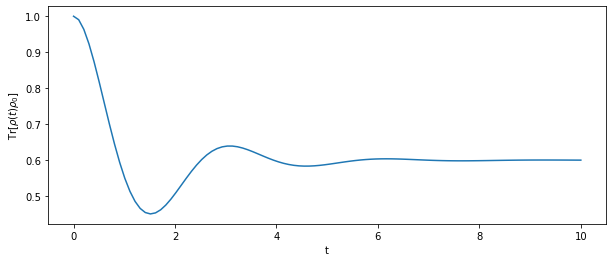

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

H = np.array([[0, 1], [1, 0.5]]) # Hamiltonian
c_ops = [np.array([[0, 1], [0, 0]])] # Lindblad operators

superop = Liouvillian(H, c_ops)
print(f'Liouvillian superoperator = \n{superop}\n')
rho0 = np.array([[1, 0], [0, 0]]) # initial state

# propagation using exmp from scipy
def Propagate(rho0, superop, t):
    d = len(rho0)
    propagator = expm(superop * t)
    vec_rho_t = propagator @ np.reshape(rho0, (d**2, 1))
    return np.reshape(vec_rho_t, (d, d))

# time steps
times = np.linspace(0, 10, 100)
# Popoulation of rho0 in time with expm
pops = np.array([np.real(np.trace(Propagate(rho0, superop, t) @ rho0)) for t in times])

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(times, pops)
ax.set_xlabel('t')
ax.set_ylabel(r'$\text{Tr}[\rho(t)\rho_0]$')
plt.show()

**3.4.1. Singular value decomposition of the Liouville superoprator**

The superoperator $\mathcal{L}$ is generally a complex, non-Hermitian matrix. For this reason a spectral decomposition of $\mathcal{L}$ is not always guaranteed, that is, $\mathcal{L}$ may not admit the diagonal representation $\mathcal{L} = VDV^{-1}$.

However, $\mathcal{L}$ always admits a singular value decomposition (SVD), and therefore can be represented in terms of its left and right-singular vectors, $\boldsymbol{L}_k$ and $\boldsymbol{R}_k$, respectively, and the set of complex singular values ${\lambda_k}$, that abide by the following relationships,

$$\mathcal{L}\boldsymbol{R}_k = \lambda_k \boldsymbol{R}_k$$
$$\boldsymbol{L}_k^\dagger \mathcal{L} = \lambda_k \boldsymbol{L}_k^\dagger$$

Each left and right-singular vectors can be normalized via,

$$\hat{\boldsymbol{R}}_k = \boldsymbol{R}_k/\sqrt{\boldsymbol{L}_k^\dagger\boldsymbol{R}_k}$$

$$\hat{\boldsymbol{L}}_k^\dagger = \boldsymbol{L}_k^\dagger/\sqrt{\boldsymbol{L}_k^\dagger\boldsymbol{R}_k}$$

The normalized singular vector pairs then follow the usual orthonormalisation condition,

$$\hat{\boldsymbol{L}}_i^\dagger\hat{\boldsymbol{R}}_j = \delta_{ij}$$

The solution of the $\dot{\boldsymbol{\rho}} = \mathcal{L}\boldsymbol{\rho}$ for a system with time independent Liouville superoperator $\mathcal{L}$ can now be expresed as follows,

$$\boldsymbol{\rho}(t) = \sum_{k=1}^{d^2} \hat{\boldsymbol{L}}_k^\dagger \boldsymbol{\rho}(t_0)\hat{\boldsymbol{R}}_ke^{\lambda_k(t-t_0)}$$

where d is the dimension of the Hilbert space.

The advantage of expressing the time evolution in forms of $\boldsymbol{\rho}(t) = exp[\mathcal{L}(t-t_0)]\boldsymbol{\rho}(t_0)$ and the above equation is that it is exact (when the singular values are found exactly) for all times and therefore does not depend on the step size or other operational details of the integration routine used to solve the differential equation.

In the following python code, we used scipy to obtain the temporal solution for a system with,

$$H=\hbar \begin{pmatrix} 0 & \Omega \\ \Omega & 0 \end{pmatrix}, \quad L = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \text{and} \quad \boldsymbol{\rho}(0) = (0, 0, 0, 1)^\text{T}$$

using the singular value decomposition $\mathcal{L}$.

D = 
[-2.00000000e-02+1.00000000e-01j -2.00000000e-02-1.00000000e-01j
  3.55258933e-18-1.58930249e-20j  6.52009137e-19+2.47105618e-19j]

left = 
[[ 0.5       +0.00000000e+00j -0.5       +8.32667268e-17j
   0.7055526 +8.32667268e-17j  0.62691975+7.45931095e-17j]
 [-0.5       -1.66533454e-16j -0.5       +2.22044605e-16j
  -0.035266  -3.08518414e-02j  0.06355101-3.20831575e-01j]
 [ 0.5       +5.55111512e-17j  0.5       +0.00000000e+00j
  -0.035266  -3.08518414e-02j  0.06355101-3.20831575e-01j]
 [-0.5       -8.32667268e-17j  0.5       -5.55111512e-17j
   0.7055526 +0.00000000e+00j  0.62691975+0.00000000e+00j]]

right = 
[[ 0.5       +0.00000000e+00j -0.5       -2.77555756e-17j
  -0.06355101-3.20831575e-01j  0.035266  -3.08518414e-02j]
 [-0.5       -5.55111512e-17j -0.5       +1.11022302e-16j
   0.62691975+0.00000000e+00j  0.7055526 +8.32667268e-17j]
 [ 0.5       +2.77555756e-17j  0.5       +0.00000000e+00j
   0.62691975-2.77555756e-17j  0.7055526 +0.00000000e+00j]
 [-0.5       -2.77555756e

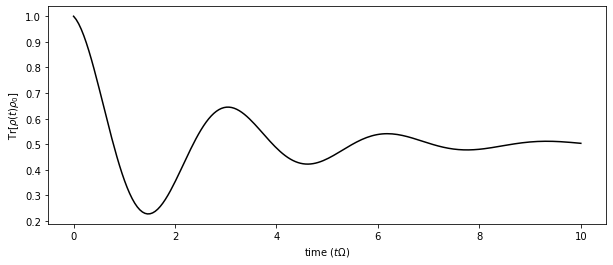

In [28]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# parameters
Omega = 0.05
Gamma = Omega / 5

# Build the superoperator
H_s = np.array([[0, Omega], [Omega, 0]])
L = np.sqrt(Gamma) * np.array([[0, 1], [1, 0]])
superop = Liouvillian(H_s, [L])

# Finding matrices containing normalized right and left eigenvectors
D, left, right = eig(superop, left=True, right=True)

print(f'D = \n{D}\n')
print(f'left = \n{left}\n')
print(f'right = \n{right}\n')

# inital state in vectorized form
vec_rho_0 = np.array([0, 0, 0, 1], dtype=complex)

# solution
ts = np.linspace(0, 200, 200)
vec_rho_t = np.zeros((len(vec_rho_0), len(ts)), dtype=complex)

for k in range(len(H_s)**2):
    norm_fac = np.sqrt(left[:, k].T.conj() @ right[:, k])
    left_k_dag_norm = left[:, k] / norm_fac
    right_k_norm = right[:, k] / norm_fac
    ak = left_k_dag_norm @ vec_rho_0
    vec_rho_t += ak * np.array([right_k_norm * np.exp(D[k] * t) for t in ts]).T

# population dynamics
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(ts*Omega, np.real(vec_rho_t[3]), 'k-')
ax.set_xlabel(r'time ($t\Omega$)')
ax.set_ylabel(r'$\text{Tr}[\rho(t)\rho_0]$')
plt.show()

**3.4.2 Time-dependent generators**

If the Hamiltonian or the decoherence terms depend on time,

$$\boldsymbol{\dot{\rho}} = \mathcal{L}(t)\boldsymbol{\rho}$$

where the Liouville generator $\mathcal{L}$ now explicitly depends on time. In this case the solution is not valid.

The general solution is given by

$$\boldsymbol{\rho}(t) = \mathcal{T}{exp[\int_0^t ds\mathcal{L}(s)]}\boldsymbol{\rho}(t_0)$$

where $\mathcal{T}$ is the time-ordering operator, analogue to the Dyson series for the time-dependent Hamiltonians and wavefunction propagation. This equation can be approximated, for instance, by means of a sequence of step-wise time-independent generators.

If the generator $\mathcal{L}(t)$ is approximately *piecewise time-independent*, then the equation $\boldsymbol{\rho}(t) = exp[\mathcal{L}(t-t_0)]\boldsymbol{\rho}(t_0)$ can be applied to each time slice, using the result of the previous slice to provide the input state for the next slice.

It can be used to compute the effect of applying a laser pulse resonant with an atomic transition, to then observing the behaviour of the system while the pulse is on and immediately after it has been turned off.

For example, let us consider a system with Hamiltonian 

$$H = H_0 + v(t)H_1$$

where 

$$H_0 = \omega_0\sigma_z/2, \quad H_1 = \omega_0\sigma_x/2, \quad v(t) = \cos{(\omega t)}$$

and a Lindblad dephasing operator 

$$J = |g\rangle\langle g| = (\mathbf{1} - \sigma_z)/2$$

with dephasing rate $\gamma$.

The generator $\mathcal{L}(t) = \mathcal{L}_0 + \mathcal{L}_1(t)$ can be split into a time-independent part $\mathcal{L}_0$, associated with $H_0$ and $L_0$, and a time-dependent part $\mathcal{L}_1(t)$. To reduce the computational cost when propagating this system, we can update the propagator by updating only the time-dependent part.

The following python script generalises the solution to the case of time-dependent generators, by updating the superoperator at each time t. For this approach to be accurate, the time step $\delta t$ has to be sufficiently smal so that $v(t+\delta t) \approx v(t) + \mathcal{O}(\delta t^2)$.

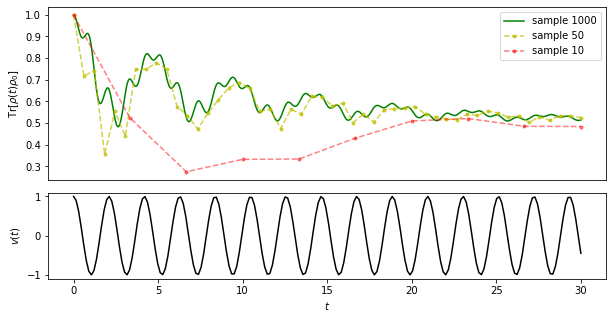

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

omega0, omega, gamma = 2, 3, 0.3
H0 = omega0 * np.array([[1, 0], [0, -1]]) / 2
H1 = omega0 * np.array([[0, 1], [1, 0]]) / 2
c_ops = [np.sqrt(gamma) * np.array([[0, 0], [0, 1]])] # Lindblad operator
L0 = Liouvillian(H0, c_ops) # superoperator L0
L1 = Liouvillian(H1, []) # superoperator without time dependence
rho0 = np.array([[1, 0], [0, 0]]) # initial state

# time-dependent coupling
v = lambda t: np.cos(omega * t)

# method for the dynamics of the system
def dynamics(tf, sample):
    times = np.linspace(0, tf, sample)
    dt = times[1] - times[0]
    d = len(rho0) # dimension of the system
    v_rho_t = np.reshape(rho0, (d**2, 1)) # vectorized rho0
    pops = []
    
    # propagation
    for t in times:
        rho_t = np.reshape(v_rho_t, (d, d)) # reshape to density matrix
        pops.append(np.real(np.trace(rho_t @ rho0))) # append population
        superop = L0 + v(t) * L1 # update superoperator
        P = expm(superop * dt) # propagator
        v_rho_t = P @ v_rho_t # propagate state for dt
    return (times, np.array(pops))

# results
tf = 30
data_hi  = dynamics(tf, sample=1000)
data_mid = dynamics(tf, sample=50)
data_low = dynamics(tf, sample=10)
times = np.linspace(0, tf, 200)

# plot
fig, (ax, av) = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0.1)
ax.plot(*data_hi, 'g-', alpha=1, label=f'sample {len(data_hi[0])}')
ax.plot(*data_mid, 'y.--', alpha=0.7, label=f'sample {len(data_mid[0])}')
ax.plot(*data_low, 'r.--', alpha=0.5, label=f'sample {len(data_low[0])}')
ax.set_ylabel(r'$\text{Tr}[\rho(t)\rho_0]$')
ax.set_xticks([])
av.set_xlabel(r'$t$')
av.plot(times, v(times), 'k-')
av.set_ylabel(r'$v(t)$')
ax.legend()
plt.show()

**3.4.3. Propagation ia semigroup composition**

The dynamical maps generated by a linear Markovian quantum master equation are a family of single-parameter maps $\Lambda_t$ that have the following composition property,

$$ \Lambda_s \circ \Lambda_t = \Lambda_{s+t}, \quad t,s \geq 0 $$

and, therefore, are known as a *quantum dynamical semigroup* (QDS). The above can also be expressed as $\Lambda_s[\Lambda_t[\rho]] = \Lambda_{s+t}[\rho]$. Thus,

$$ P(s)(t) = P(s+t), \quad t,s \geq 0 $$

When propagating a system in time over an evenly-spaced time set $\{k\delta t\}^m_{k=1}$ we can exploit the composition rule of dynamical semigroups to vastly reduce the computational cost of propatation. Instead of calculating a new propagator $P(t_k)$ for each time step $t_k = t_0 + k\delta t$, we can calculate a single propagator $P_1 = P(\delta t)$ and obtain all the others using

$$ P(t_k) = \prod_{j=1}^k P_1 = P_1^k $$

This approach is particularly useful when propagating for very long times or when using large time-steps, in which cases scipy's integrate methods usually tend to accumulate large numerical errors.

The following python script implements and the results are shown in bellow.

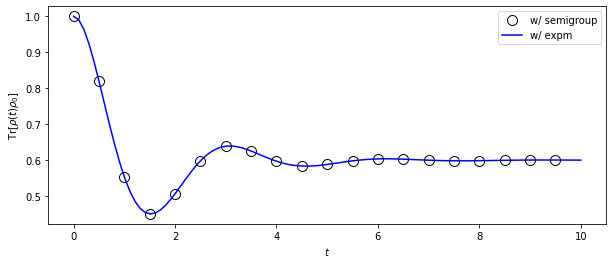

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

H = np.array([[0, 1], [1, 0.5]]) # Hamiltonian
c_ops = [np.array([[0, 1], [0, 0]])] # Lindblad operators

superop = Liouvillian(H, c_ops) # superoperator
rho0 = np.array([[1, 0], [0, 0]]) # initial state

dt, m = 0.5, 20
d = len(rho0) # dimension of the system
P = expm(superop * dt) # propagator
times_0, pops_0 = [], []
t, rho = 0., rho0

# propagation
for k in range(m):
    pops_0.append(np.real(np.trace(rho @ rho0))) # append population
    times_0.append(t) # append time
    # propagate time and state
    t, rho = t + dt, np.reshape(P @ np.reshape(rho, (d**2, 1)), (d, d))

# propagation using exmp from scipy
def Propagate(rho0, superop, t):
    d = len(rho0)
    propagator = expm(superop * t)
    vec_rho_t = propagator @ np.reshape(rho0, (d**2, 1))
    return np.reshape(vec_rho_t, (d, d))

times_1 = np.linspace(0, 10, 100) # time steps
pops_1 = np.array([np.real(np.trace(Propagate(rho0, superop, t) @ rho0))
                   for t in times_1]) # expm

# plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(times_0, pops_0, 'ko', label='w/ semigroup', fillstyle='none', markersize=10)
ax.plot(times_1, pops_1, 'b-', label='w/ expm')
ax.set_ylabel(r'$\text{Tr}[\rho(t)\rho_0]$')
ax.set_xlabel('$t$')
ax.legend()
plt.show()

**3.4.4. Baker–Campbell–Hausdorff & Zassenhaus formula**

Hamiltonians and superoperators are often sums of two or more terms, such as $W = U + V$. When the terms commute with each other $[U,V]=0$, the solution can be obtained from the composition of individual terms. For example, let $\mathcal{L} = \mathcal{L}_1 + \mathcal{L}_2$, with $[\mathcal{L}_1, \mathcal{L}_2] = 0$, then

$$ P(t) = \exp(\mathcal{L}t) = \exp(\mathcal{L}_1t)\exp(\mathcal{L}_2t) $$

Instead, when considering pairs of non-commuting operators $[X,Y] \neq 0$, we have $\exp(X + Y) \neq \exp(X)\exp(Y) = \exp(Z)$. The solution to the latter equation for $Z$ is known as the Baker-Campbell-Hausdorff (BCH) formula, and reads,

$$ Z = X + Y + \frac{1}{2}[X, Y] + \frac{1}{12}\left([X,[X,Y]] + [Y,[Y,X]]\right) + ... $$

The BCH solution finds application when used in the Zassenhaus formula, which allows us to decompose a matrix exponential $\exp[(X + Y)t]$, where $t$ is a scalar parameter, in terms of a product series,

$$ \exp[(X + Y)t] = \exp[Xt]\exp[Yt]\exp\left[-\frac{1}{2}[X, Y]t^2\right]\exp\left[\frac{1}{3}\left([Y,[X,Y]] + \frac{1}{2}[X,[X,Y]]\right)t^3\right] \cdots $$

The formula becoms useful when the product series can be truncated or approximated to a certain set of terms. This is for example particularly useful when the generator is time-dependent $\mathcal{L}_t$ and $[\mathcal{L}_t, \mathcal{L}_s] \neq 0$.

**3.4.5. Suzuki-Trotter expansion**

A consequence of the Zassenhaus formula is that, for *small* time steps $\delta t$, the Zassenhaus formula can be truncated to the first order in $\delta t$ with errors of the order of $O(\delta t^2)$

$$ \exp[(X + Y)t] = \exp[Xt]\exp[Yt] + O(\delta t^2) $$

This can be used to obtain the solution for long times using the product series,

$$ \exp[(X + Y)\delta t] = \lim_{n \rightarrow \infty}\left[\exp\left(X\frac{t}{n}\right)\exp\left(Y\frac{t}{n}\right)\right]^n $$

also known as *Suzuki–Trotter expansion* or *Lie product formula*. This approach is particularly useful when studying the dynamics of interacting many body or time-dependent generators. The following python script uses the Suzuki–Trotter expansion to propagate a system by separating the contribution of the two non-commuting super operators.

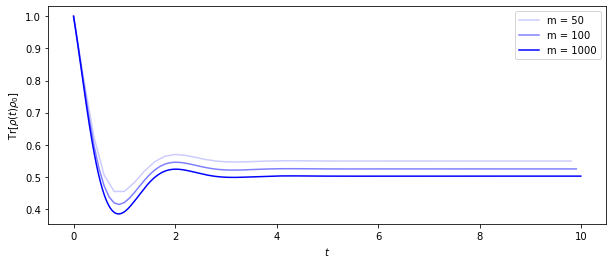

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

sx = np.array([[0, 1], [1, 0]]) # sigma x
sy = np.array([[0, -1j], [1j, 0]]) # sigma y
sp = (sx + 1j * sy) / 2 # simga plus
sm = (sx - 1j * sy) / 2 # sigma minus

superop_1 = Liouvillian(sx, [sp]) # superoperator 1
superop_2 = Liouvillian(sy, [sm]) # superoperator 2
rho0 = np.array([[1, 0], [0, 0]]) # initial state

# plot
fig, ax = plt.subplots(figsize=(10, 4))
alpha = [0.2, 0.5, 1]

# propagation
for km, m in enumerate([50, 100, 1000]):
    dt = 10 / m # time step
    d = len(rho0) # dimension of the system
    P_1, P_2 = expm(superop_1 * dt), expm(superop_2 * dt) # propagators
    P = P_1 @ P_2 # suzuki-trotter expansion
    times_0, pops_0 = [], []
    t, rho = 0., rho0

    # propagation
    for k in range(m):
        pops_0.append(np.real(np.trace(rho @ rho0)))
        times_0.append(t)
        t, rho = t + dt, np.reshape(P @ np.reshape(rho, (d**2, 1)), (d, d))

    # plot
    ax.plot(times_0, pops_0, 'b-', label=f'm = {m}', alpha=alpha[km])

# time steps
times_1 = np.linspace(times_0[0], times_0[-1], 20)

# plot
ax.legend()
ax.set_ylabel(r'$\text{Tr}[\rho(t)\rho_0]$')
ax.set_xlabel(r'$t$')
plt.show()

**3.4.7. Solution using the stochastic wavefunction method**

Since the amount of complex floating point numbers required to represent superoperators like $\mathcal{L}$ and $P$ scales as $d^4$, memory may become an issue for large systems. To circumvent this problem we can propagate a density operator using the stochastic wavefunction method, also known as *Monte Carlo wavefunction* method or *master equation unravelling*.

Instead of propagating a density operator solving the equation, the method provides a procedure to propagatre a state vector $|\psi_0\rangle$ under the influene of some generator $\mathcal{L}$, by sampling a sufficiently large amount $N$ of stochastic trajectories $\Psi_j = {|\psi_j(t)\rangle}$, to then obtain the time-evolved density operator $\rho(t)$ by averaging over them,

$$\rho(t) = \sum_{j=1}^{N}|\psi_j(t)\rangle\langle\psi_j(t)|$$

Let $H$ be the Hamiltonian of the system, and ${L_k}_{k=1}^M$ a collection of Hermitian Lindblad operators. In the simplest form of the method, each trajectory $\Psi_j$ is sampled according to the following steps:

1. The probabilites associated with any of the $k$ incoherent transitions mediated by the $L_k$ jump operators is calculated,

$$ \delta p_k = \delta t \langle\psi(t)|L_k^\dagger L_k|\psi(t)\rangle \geq 0$$

with $\delta p = \sum_{k=1}^M \delta p_k$.

2. A uniform random number $ u \in (0, 1]$ is sampled.

    (a) if $\delta p < u$, then no jump occurs and the state $|\psi(t)\rangle$ at time $t$ is evolved by means of the non-Hermitian effective Hamiltonian $H_{\text{eff}} = H - i\hbar \sum_{k=1}^M L_k^\dagger L_k /2$,

    $$ |\tilde{\psi}(t + \delta t)\rangle = \left(1 - \frac{i}{\hbar}H_{\text{eff}}^\dagger \delta t\right)|\psi(t)\rangle$$

    where $\tilde{\psi}\rangle$ indicates that the state vector may not be normalised.

    (b)
